# Linear regression

Regression, and in particular linear regression, is one of the simplest forms of Machine Learning_ we try to find the **best parameters** defining a model that describes the relationships between variables of a dataset. In the case of simple regression, we typically want to find the slope ```a``` and intercept ```b``` of a line describing the relation between two **features** ```x``` and ```y```. As shown below, it can ba argued whether this is really Machine Learning:

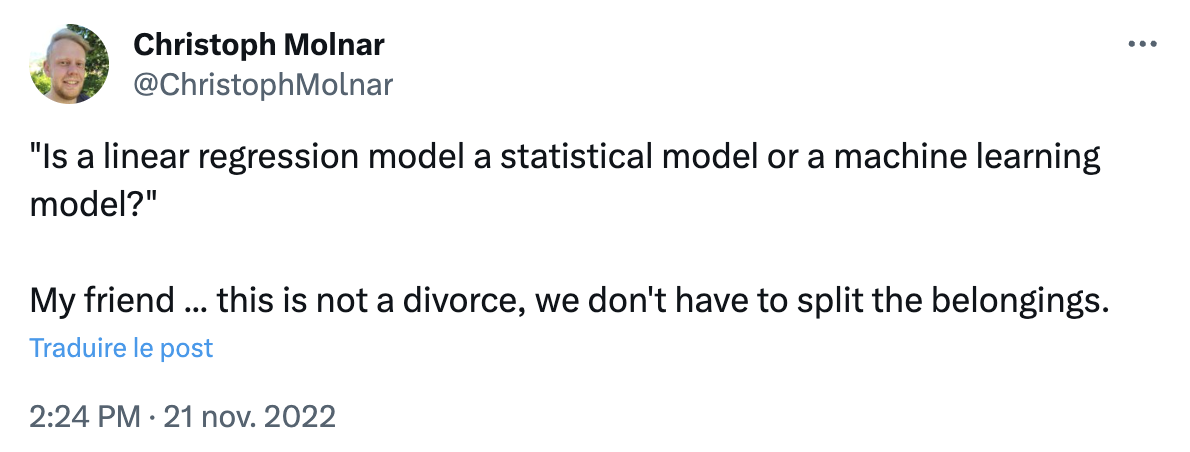

In [1]:
from IPython.display import Image
Image('../illustrations/linear_regression_ml.png', width=500)

In fact simple regression uses all elements of Machine Learning:
- a model with parameters to tune
- a dataset that the model needs to be optimized for
- a variable quantifying the model quality given the data and parameters
- an algorithm to achieve this optimization

## Dataset

Throughout this lecture we will use multiple datasets as examples: some are classical examples, and some or specific to this course. One specific dataset that we will frequently see was generated using the [phyphox](https://phyphox.org/) app which can record phone sensor information. It contains different types of movements that I recorded holding my phone and we will use these data to explore regression, classification, clustering etc. 

In this first example for linear regression, I held the phone at arm's length, rotated with it at varying speeds, and recorded the angular speed $\omega$ and acceleration $a$. Data were then exported as CSV files.

We can now import the data using pandas using the ```read_csv``` function:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
centripetal = pd.read_csv('../data/centripetal.csv')

In [4]:
centripetal.head(4)

,Time (s),Angular velocity (rad/s),Acceleration (m/s^2)
0,0.164462,0.244854,0.914340
1,0.662064,0.998748,0.681787
2,1.159666,0.849103,0.780060
3,1.657269,0.955166,1.405090


We start by renaming the variables of interest, **v** and **a**, to make it easier to work with them.

In [5]:
centripetal.columns = ['time', 'v', 'a']

We can plot them using simple Matplotlib:

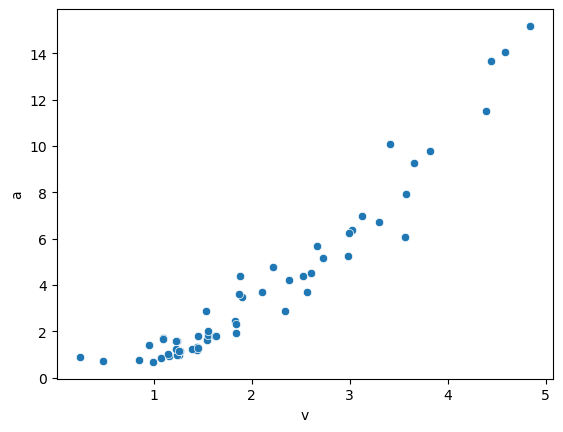

In [6]:
sns.scatterplot(x=centripetal['v'], y=centripetal['a']);

## Regression

Let's now use scikit-learn for the first time to see if we can find a good model. A great feature of scikit-learn is that all models work with the same logic and syntax: once you know one, you can explore almost all models (you will have to read about the models and their options though).

### Create a model

The first step is to initialize a model. Those are stored in different submodules that we will explore. Regression models are in the ```linear_model``` module:

In [7]:
from sklearn.linear_model import LinearRegression

We now *instantiate* a model object. That object will contain both function (e.g. for training and predictio) and variables such as as the model parameters:

In [8]:
lin_model = LinearRegression()

### Define features

Then we need to define what are the features and targets of our model. Features are always the data that we **can measure** while the target is the quantity we wish to **predict** (and that we only measured in the training set). scikit-learn always calls the features variable ```X``` and the target ```y```and we stick to that convention. Let's first define ```y``` by selecting a column of the dataframe:

In [9]:
y = centripetal['a']

Note that here we obtain a Pandas series:

In [10]:
y.head(4)

0    0.914340
1    0.681787
2    0.780060
3    1.405090
Name: a, dtype: float64

but we could use a simple Numpy array as well with:

In [11]:
centripetal['a'].values

array([ 0.91433952,  0.68178712,  0.7800602 ,  1.40508966,  1.59267936,
        0.84970685,  1.69873461,  0.96950467,  0.92282025,  1.29660984,
        0.97650498,  1.60102905,  1.80558677,  1.14796067,  1.67871873,
        1.22687647,  1.16100386,  1.04204641,  1.64540564,  1.20512688,
        1.85467061,  1.31417435,  1.22363746,  2.01291308,  2.46133772,
        1.29867436,  2.32984589,  1.78908739,  1.80268191,  1.94681067,
        3.47518135,  2.8651571 ,  2.87478354,  3.69116941,  3.71188302,
        3.62870901,  4.77502918,  4.22165534,  4.38463571,  5.17199237,
        4.50695989,  6.3889671 ,  5.68074454,  6.97644768,  5.24027837,
        6.25873118,  6.72580341,  7.91820502,  9.77985337,  9.27663887,
        6.07378914, 10.07778597, 14.07259684, 13.65095683, 15.17765284,
       11.49957676,  4.37751391,  0.7048127 ])

For X, we need to be careful about the dimensions: in almost all cases, models can take more than one feature as input, i.e. we can have $N$ data points with $m$ features each. Hence all models **expect a two-dimensional $X$** variable with dimensions $Nxm$. In the case we have a single feature, using:

In [12]:
X = centripetal['v']
X.shape

(58,)

results again in a series which is a one-dimensional variable. We can either transform this into a DataFrame:

In [13]:
X = pd.DataFrame(X)
X.head(4)

,v
0,0.244854
1,0.998748
2,0.849103
3,0.955166


In [14]:
X.shape

(58, 1)

which is now a 2D object. Or we can directly extract a list of columns (note the additional ```[]```:

In [15]:
centripetal[['v']].head(4)

,v
0,0.244854
1,0.998748
2,0.849103
3,0.955166


Or finally, we can use a Numpy array and add an axis:

In [16]:
X = centripetal['v'].values[:, np.newaxis]

In [17]:
X.shape

(58, 1)

### Train the model

Now that we have a model and data, we can just train it. For this we use the ```fit``` method and the selected features and target:

In [18]:
lin_model.fit(X=X, y=y)

LinearRegression()

It looks like nothing happened, but the internal state of ```lin_model``` has changed. In this particular case, the model parameters are separated in coefficients, i.e. the slope:

In [19]:
lin_model.coef_

array([3.1895694])

and intercept:

In [20]:
lin_model.intercept_

-2.7580552568230137

### Predictions

Now that the model is trained, we can use it to make predictions. Note that here the word prediction doesn't have any temporal meaning. It is just used to express the fact that the model can produce an output (prediction) for any input, especially not seen during training. This is done via the ```predict``` function. Note that the function takes a variable ```X``` as input **which should have the same dimensions as the ```X``` used above for training. In other words, if we trained with $m$ features, we can only make predictions for variables with $m$ features as well. Let's say we pick an angular velocity of $7$, then we need to transform this single variable into a 2D object:

In [21]:
lin_model.predict([[7]])

array([19.56893058])

Of course we can do predictions for multiple points at the same time. Typically we do it for a series of points covering our original dataset:

In [22]:
X_pred = np.arange(0,7)[:, np.newaxis]

In [23]:
y_pred = lin_model.predict(X=X_pred)

In [24]:
y_pred

array([-2.75805526,  0.43151415,  3.62108355,  6.81065296, 10.00022236,
       13.18979177, 16.37936117])

### Visual representation

Now that we made a series of predictions, we can visualize the result:

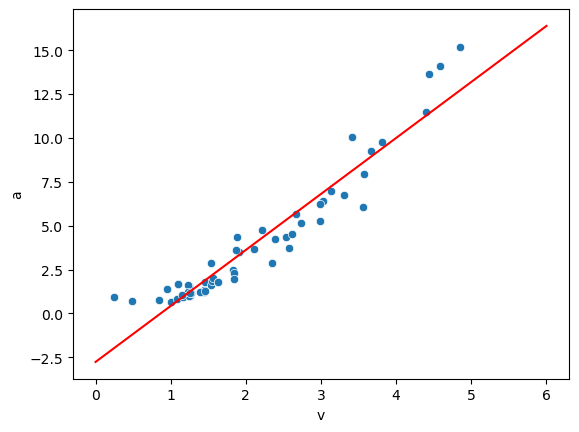

In [25]:
sns.scatterplot(x=centripetal['v'], y=centripetal['a'])
sns.lineplot(x=np.arange(0,7), y=y_pred, color='red');

## Polynomial fit

Clearly our fit above is not optimal. If you remember your mechanics lecture, you might remember why, but let's assume we don't. Instead of fitting just a line, we could try to fit a polynomial i.e. go from $y = ax + b$ which as only one coefficient, to $y= a_1x + a_2x^2 + ... + a_nx^n + c$ which has $n$ coefficients. Instead of explicitly using a function, we can turn this into a linear regression with multiple variables: each variable is now a power of the original feature!

We could manually create features using $X, X^2$ etc. but there's a simpler way to do that using the ```PolynomialFeatures``` object:

In [26]:
from sklearn.preprocessing import PolynomialFeatures

It works similarly to the model objects. We instantiate it for a specific degree):

In [27]:
poly = PolynomialFeatures(degree=2)

Since we don't need to train a model here, we can directly use the ```poly``` object to generate the features using ```fit_transform```. We also transform the output into a DataFrame for clarity:

In [28]:
X_poly = poly.fit_transform(X)

In [29]:
X_poly = pd.DataFrame(X_poly, columns=('cst', 'degree1', 'degree2'))

In [30]:
X_poly.head(4)

,cst,degree1,degree2
0,1.0,0.244854,0.059954
1,1.0,0.998748,0.997498
2,1.0,0.849103,0.720975
3,1.0,0.955166,0.912342


The ```poly``` object has added a constant column (for the abcisse) and a column with squared values of ```X```. We can use these **three features** now in our model:

In [31]:
lin_model.fit(X=X_poly, y=y)

LinearRegression()

For the prediction, we need now to provice the same type of structure, by transforming our list of values in the same way:

In [32]:
X_pred_poly = np.arange(0,7,0.5)[:, np.newaxis]
X_pred_poly = poly.fit_transform(X_pred_poly)
X_pred_poly

array([[ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.5 , 20.25],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  5.5 , 30.25],
       [ 1.  ,  6.  , 36.  ],
       [ 1.  ,  6.5 , 42.25]])

In [33]:
y_pred_poly = lin_model.predict(X=X_pred_poly)

/Users/gw18g940/mambaforge/envs/DAVPy2023/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


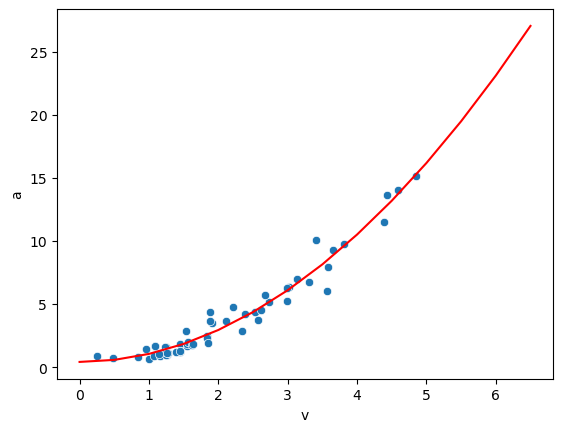

In [34]:
sns.scatterplot(x=centripetal['v'], y=centripetal['a'])
sns.lineplot(x=np.arange(0,7,0.5), y=y_pred_poly, color='red');

We see that the model works much better now! Remembering that $a = \omega^2*r$ where $r$ is the radius, we can check whether the recovered value is realistic:

In [35]:
lin_model.coef_

array([0.        , 0.00624014, 0.62881036])

The two first coefficients are close to zero (there are no terms for them in our equation), while the last one corresponds to an arm's length of 60cm.

## Exercise

1. Import the files [../data/Displacement1](../data/Displacement1) and [../data/Displacement2](../data/Displacement2). They were acquired walking towards a wall and measuring the distance to te wall(```z``` represents the distance). Model these two datasets with what you have learned here. What can you learn about how I walked towards the wall?

2. Import the file [../data/Displacement3](../data/Displacement3) which was acquired the same way as [../data/Displacement1](../data/Displacement1) but with errors in the acquisition. Use first the ```LinearRegression``` model and then the ```RANSACRegressor``` from the same module. Read the [docs for RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html). Do you understand what happens?